In [1]:
import pandas as pd
import pickle
import random
pd.set_option('display.max_columns',100)
%matplotlib inline


In [2]:
newsData = pd.read_pickle('../Data/Feedly_Processed_DF_cleaned.pkl')
sectorLabels = pd.read_csv('../Data/Labeled_Data/sectors.csv')[['article_id','top_sector','Sectors']]

In [3]:
len(newsData[newsData['url'].str.contains('iadb')])

85

In [4]:
#remove iadb website
newsData = newsData[~newsData['url'].str.contains('iadb')]

In [5]:
articles_df = pd.merge(newsData,sectorLabels, on='article_id')[['article_id','title','article_text','top_sector']]
articles_df['content'] = articles_df['title'] + " \n" + articles_df['article_text']
articles_df['sector'] = articles_df['top_sector']
articles_df.head()

,article_id,title,article_text,top_sector,content,sector
0,5eca9220,"AfDB, GCF partner on 'Desert-to-Power' scheme","The African Development Bank (AfDB), Green Cli...",MISC,"AfDB, GCF partner on 'Desert-to-Power' scheme ...",MISC
1,ee5530a3,AIIB approves $1.5 bln of loans to India for i...,"NEW DELHI, Feb 27 (Reuters) - China-based Asia...",transport,AIIB approves $1.5 bln of loans to India for i...,transport
2,185416ad,"India, ADB sign USD 250 million loan agreement...",Here are some suggestions that matches your en...,transport,"India, ADB sign USD 250 million loan agreement...",transport
3,ef56fb55,EIB approves $1.8bn financing for Trans-Adriat...,Compelo is using cookies\n\nWe use them to giv...,energy,EIB approves $1.8bn financing for Trans-Adriat...,energy
4,85f28676,EBRD increases its portfolio in Azerbaijan,"Baku, Azerbaijan, April 9\n\nBy Anvar Mammadov...",industry and trade,EBRD increases its portfolio in Azerbaijan \nB...,industry and trade


In [6]:
projects_df = pd.read_csv('../Data/EWS_Published Project_Listing_DD.csv', encoding='ISO-8859-1')


In [7]:
projects_df.head()

,EWS ID,ProjectNumber,Published,Bank Risk Rating,Project Status,EWS URL,Detailed Analysis URL,Project Name,City,Country Count,Country 1,Country 2,Country 3,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12,Borrower or Client,Private Actor Count,Private Actor 1,Private Actor 2,Private Actor 3,Private Actor 4,Private Actor 5,Private Actor 6,Private Actor 7,Private Actor 8,Private Actor 9,Private Actor 10,Private Actor 11,Private Actor 12,Private Actor 13,Private Actor 14,Private Actor 15,Bank Count,Bank 1,Bank 2,Bank 3,Bank 4,Bank 5,Sector Count,Sector 1,Sector 2,Sector 3,Sector 4,Sector 5,Sector 6,Sector 7,Last Edited,Date Scraped,Date Disclosed,Board Date,Source URL,Project Cost,Investment Amount,Project Description,Contact Information
0,29164,AFDB-P-TN-BB0-007,Published,U,Proposed,https://ews.rightsindevelopment.org/projects/p...,NaN,TUNISIA FERTILIZER PROJECT,NaN,1,Tunisia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,African Development Bank (AFDB),NaN,NaN,NaN,NaN,1,Agriculture and Forestry,NaN,NaN,NaN,NaN,NaN,NaN,9/4/17,8/15/17,12/13/01,12/13/01,http://www.afdb.org/en/projects-and-operations...,NaN,NaN,None,ACCOUNTABILITY MECHANISM OF AfDB\r\r\r\rThe In...
1,29166,AFDB-P-SZ-HAA-001,Published,U,Approved,https://ews.rightsindevelopment.org/projects/p...,NaN,LINE OF CREDIT TO SWAZILAND DEVELOPMENT FINANC...,NaN,1,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,African Development Bank (AFDB),NaN,NaN,NaN,NaN,2,Finance,Industry and Trade,NaN,NaN,NaN,NaN,NaN,9/4/17,8/15/17,12/13/01,5/12/17,http://www.afdb.org/en/projects-and-operations...,4.76,1.36,None,MACHARIA Lilian Wanjiru - PIFD1\r\r\r\rACCOUNT...
2,29931,IADB-UR-T1100,Pending,C,Approved,https://ews.rightsindevelopment.org/projects/u...,NaN,Supporting INEFOP in Improving Labor Training ...,NaN,1,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Inter-American Development Bank (IADB),NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/3/17,12/31/99,7/16/13,http://www.iadb.org/en/projects/project-descri...,0.44,0.44,NaN,NaN
3,30104,IADB-BR-T1279,Pending,C,Approved,https://ews.rightsindevelopment.org/projects/b...,NaN,"Racial Equality and Social, Economic, Politica...",NaN,1,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Inter-American Development Bank (IADB),NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/3/17,12/31/99,6/4/13,http://www.iadb.org/en/projects/project-descri...,0.97,0.82,NaN,NaN
4,30322,IADB-PE-T1297,Pending,C,Approved,https://ews.rightsindevelopment.org/projects/p...,NaN,Adaptation to Climate Change of the Fishery Se...,NaN,1,Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Inter-American Development Bank (IADB),NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/3/17,12/31/99,12/4/13,http://www.iadb.org/en/projects/project-descri...,1.50,1.50,NaN,NaN


In [8]:
projects_df['Project Description'] = projects_df['Project Description'].fillna("")

In [9]:
detailed_projects_df = projects_df[ projects_df['Project Description'].apply(lambda x : len(x.split())) > 300 ]

In [10]:
detailed_projects_df = detailed_projects_df[['Project Name','Sector 1','Project Description']]
detailed_projects_df['content'] = detailed_projects_df['Project Name'] + "\n" +  detailed_projects_df['Project Description']
detailed_projects_df.head()

,Project Name,Sector 1,Project Description,content
40,India: National Cyclone Risk Mitigation Projec...,Climate and Environment,The National Cyclone Risk Mitigation Project I...,India: National Cyclone Risk Mitigation Projec...
43,Cusco Regional Development,Industry and Trade,The Cusco Regional Development Project is loca...,Cusco Regional Development\nThe Cusco Regional...
60,IN Uttar Pradesh Water Sector Restructuring Pr...,Water and Sanitation,World Bank documentation indicates that this p...,IN Uttar Pradesh Water Sector Restructuring Pr...
95,Abidjan-Lagos Trade and Transport Facilitation...,Technical Cooperation,The development objective of the Second Adapta...,Abidjan-Lagos Trade and Transport Facilitation...
101,Coastal Watersheds Conservation in the Context...,Agriculture and Forestry,"According to The Bank, the goal of the project...",Coastal Watersheds Conservation in the Context...


In [11]:
detailed_projects_df.head()

,Project Name,Sector 1,Project Description,content
40,India: National Cyclone Risk Mitigation Projec...,Climate and Environment,The National Cyclone Risk Mitigation Project I...,India: National Cyclone Risk Mitigation Projec...
43,Cusco Regional Development,Industry and Trade,The Cusco Regional Development Project is loca...,Cusco Regional Development\nThe Cusco Regional...
60,IN Uttar Pradesh Water Sector Restructuring Pr...,Water and Sanitation,World Bank documentation indicates that this p...,IN Uttar Pradesh Water Sector Restructuring Pr...
95,Abidjan-Lagos Trade and Transport Facilitation...,Technical Cooperation,The development objective of the Second Adapta...,Abidjan-Lagos Trade and Transport Facilitation...
101,Coastal Watersheds Conservation in the Context...,Agriculture and Forestry,"According to The Bank, the goal of the project...",Coastal Watersheds Conservation in the Context...


In [12]:
detailed_projects_df = detailed_projects_df.rename(columns = {'Project Name':'title','Sector 1': 'sector'})
#detailed_projects_df['sector'] = detailed_projects_df['Sector 1']

In [13]:
detailed_projects_df.columns

Index(['title', 'sector', 'Project Description', 'content'], dtype='object')

In [14]:
articles_df.head()

,article_id,title,article_text,top_sector,content,sector
0,5eca9220,"AfDB, GCF partner on 'Desert-to-Power' scheme","The African Development Bank (AfDB), Green Cli...",MISC,"AfDB, GCF partner on 'Desert-to-Power' scheme ...",MISC
1,ee5530a3,AIIB approves $1.5 bln of loans to India for i...,"NEW DELHI, Feb 27 (Reuters) - China-based Asia...",transport,AIIB approves $1.5 bln of loans to India for i...,transport
2,185416ad,"India, ADB sign USD 250 million loan agreement...",Here are some suggestions that matches your en...,transport,"India, ADB sign USD 250 million loan agreement...",transport
3,ef56fb55,EIB approves $1.8bn financing for Trans-Adriat...,Compelo is using cookies\n\nWe use them to giv...,energy,EIB approves $1.8bn financing for Trans-Adriat...,energy
4,85f28676,EBRD increases its portfolio in Azerbaijan,"Baku, Azerbaijan, April 9\n\nBy Anvar Mammadov...",industry and trade,EBRD increases its portfolio in Azerbaijan \nB...,industry and trade


In [15]:
merged_df = pd.concat(
    
    [
        detailed_projects_df[['title','content','sector']]
        , articles_df[['title','content','sector']]
    ])

In [16]:
merged_df = merged_df[~pd.isnull(merged_df['sector'])]

In [17]:
len(merged_df)

608

In [18]:
merged_df.head()

,title,content,sector
40,India: National Cyclone Risk Mitigation Projec...,India: National Cyclone Risk Mitigation Projec...,Climate and Environment
43,Cusco Regional Development,Cusco Regional Development\nThe Cusco Regional...,Industry and Trade
60,IN Uttar Pradesh Water Sector Restructuring Pr...,IN Uttar Pradesh Water Sector Restructuring Pr...,Water and Sanitation
95,Abidjan-Lagos Trade and Transport Facilitation...,Abidjan-Lagos Trade and Transport Facilitation...,Technical Cooperation
101,Coastal Watersheds Conservation in the Context...,Coastal Watersheds Conservation in the Context...,Agriculture and Forestry


In [19]:
merged_df.sector.unique()

array(['Climate and Environment', 'Industry and Trade',
       'Water and Sanitation', 'Technical Cooperation',
       'Agriculture and Forestry', 'Mining', 'Energy', 'Construction',
       'Communications', 'Hydropower', 'Finance', 'Law and Government',
       'Education and Health', 'Transport', 'Infrastructure', 'MISC',
       'transport', 'energy', 'industry and trade', 'infrastructure',
       'finance', 'water and sanitation', 'construction', 'hydropower',
       'communications', 'agriculture and forestry',
       'education and health', 'humanitarian response'], dtype=object)

In [20]:
merged_df['sector'] = merged_df['sector'].apply(lambda x: x.lower())

In [21]:
dfg = merged_df.groupby(['sector']).size().reset_index(name = 'count')

In [22]:
dfg.sort_values(['count'],ascending = 0)[:10].sector.unique()

array(['energy', 'finance', 'infrastructure', 'transport',
       'agriculture and forestry', 'education and health',
       'water and sanitation', 'industry and trade', 'construction',
       'communications'], dtype=object)

In [23]:
merged_df.head()

,title,content,sector
40,India: National Cyclone Risk Mitigation Projec...,India: National Cyclone Risk Mitigation Projec...,climate and environment
43,Cusco Regional Development,Cusco Regional Development\nThe Cusco Regional...,industry and trade
60,IN Uttar Pradesh Water Sector Restructuring Pr...,IN Uttar Pradesh Water Sector Restructuring Pr...,water and sanitation
95,Abidjan-Lagos Trade and Transport Facilitation...,Abidjan-Lagos Trade and Transport Facilitation...,technical cooperation
101,Coastal Watersheds Conservation in the Context...,Coastal Watersheds Conservation in the Context...,agriculture and forestry


In [24]:
top_df = merged_df[merged_df['sector'].isin(dfg.sort_values(['count'],ascending = 0)[:10].sector.unique())]

In [25]:
data = top_df['content']
labels = top_df['sector']

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf  = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.9)

docs   = tfidf.fit_transform(data)

## want to build a multiclass classifier that uses text + title as input. want to also try topic modeling

In [27]:
#have to one hot encode the target variable. then split into test and train
top_df.sector.unique()

array(['industry and trade', 'water and sanitation',
       'agriculture and forestry', 'energy', 'construction',
       'communications', 'finance', 'education and health', 'transport',
       'infrastructure'], dtype=object)

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [29]:
top_df['target'] = le.fit_transform(labels)

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
top_df.head()

,title,content,sector,target
43,Cusco Regional Development,Cusco Regional Development\nThe Cusco Regional...,industry and trade,6
60,IN Uttar Pradesh Water Sector Restructuring Pr...,IN Uttar Pradesh Water Sector Restructuring Pr...,water and sanitation,9
101,Coastal Watersheds Conservation in the Context...,Coastal Watersheds Conservation in the Context...,agriculture and forestry,0
235,Senegal Banda Gas to Power Guarantee,Senegal Banda Gas to Power Guarantee\nAccordin...,energy,4
311,Etileno XXI,Etileno XXI\nEtileno XXI (the Project) is the ...,construction,2


In [31]:
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import Imputer, StandardScaler, FunctionTransformer
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer

In [32]:
xdata =  top_df['content']
ydata = top_df['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(xdata,ydata, test_size = 0.2, random_state = 1)

In [34]:
ml_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', min_df=5, max_df=0.9)),
    ('scaler', StandardScaler(with_mean=False)),
    ('logreg', LogisticRegression(class_weight = "balanced", multi_class='ovr'))])

In [69]:
le.classes_

array(['agriculture and forestry', 'communications', 'construction',
       'education and health', 'energy', 'finance', 'industry and trade',
       'infrastructure', 'transport', 'water and sanitation'],
      dtype=object)

In [35]:
#no param testing yet, no text cleaning either

In [36]:
ml_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [37]:
x_pred_test = ml_pipeline.predict(X_test)

from sklearn import metrics
print("----confusion matrix----")
print(metrics.confusion_matrix(y_test, x_pred_test))

print("----classification report----")
print(metrics.classification_report(y_test, x_pred_test))

----confusion matrix----
[[ 3  0  0  1  1  1  0  0  1  1]
 [ 0  1  0  0  0  0  1  0  1  0]
 [ 0  0  1  0  2  0  0  1  0  1]
 [ 1  0  0  4  1  1  1  0  0  0]
 [ 0  0  0  0 25  0  1  0  0  0]
 [ 0  0  0  1  6  9  0  0  1  0]
 [ 1  0  0  0  2  0  0  2  1  1]
 [ 0  1  0  0  4  0  0  7  2  1]
 [ 0  0  0  0  0  0  0  2 11  1]
 [ 1  0  0  0  0  1  1  0  1  3]]
----classification report----
             precision    recall  f1-score   support

          0       0.50      0.38      0.43         8
          1       0.50      0.33      0.40         3
          2       1.00      0.20      0.33         5
          3       0.67      0.50      0.57         8
          4       0.61      0.96      0.75        26
          5       0.75      0.53      0.62        17
          6       0.00      0.00      0.00         7
          7       0.58      0.47      0.52        15
          8       0.61      0.79      0.69        14
          9       0.38      0.43      0.40         7

avg / total       0.59      0

In [38]:
df_conf = pd.DataFrame(dict(s1 = y_test, s2 = x_pred_test)).reset_index()
df_conf.columns = [['old_index', 'y_test','x_pred']]


In [39]:
labeled_targets = top_df[['sector', 'target']]
labeled_targets.drop_duplicates(inplace = True)

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [40]:
labeled_targets.target.unique()

array([6, 9, 0, 4, 2, 1, 5, 3, 8, 7])

In [41]:
sectors = labeled_targets.sector.unique()
labels = labeled_targets.target.unique()
label_dict = {}
for i in range(0, len(sectors)):
    label_dict[labels[i]] = sectors[i]

In [42]:
label_dict

{6: 'industry and trade',
 9: 'water and sanitation',
 0: 'agriculture and forestry',
 4: 'energy',
 2: 'construction',
 1: 'communications',
 5: 'finance',
 3: 'education and health',
 8: 'transport',
 7: 'infrastructure'}

In [56]:
!pip install pandas_ml yellowbrick

  Using cached https://files.pythonhosted.org/packages/16/c7/e78d507a55cdde7e05050b59a073f5bf8f927240375f6aa870c591fcf707/yellowbrick-0.7-py2.py3-none-any.whl
distributed 1.21.8 requires msgpack, which is not installed.
keras-preprocessing 1.0.1 has requirement keras>=2.1.6, but you'll have keras 2.1.4 which is incompatible.
keras-applications 1.0.2 has requirement keras>=2.1.6, but you'll have keras 2.1.4 which is incompatible.
coremltools 0.8 has requirement six==1.10.0, but you'll have six 1.11.0 which is incompatible.


In [57]:
from pandas_ml import ConfusionMatrix

In [58]:
y_true = df_conf['y_test']

In [59]:
def get_label(x):
    return label_dict[x]
    

In [60]:
true_labels = []
for i in df_conf['y_test'].ix[:, 0].tolist():
    true_labels.append(label_dict[i])

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [61]:
pred_labels = []
for i in df_conf['x_pred'].ix[:, 0].tolist():
    pred_labels.append(label_dict[i])

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [62]:
confusion_matrix = ConfusionMatrix(true_labels, pred_labels)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted                 agriculture and forestry  communications  \
Actual                                                               
agriculture and forestry                         3               0   
communications                                   0               1   
construction                                     0               0   
education and health                             1               0   
energy                                           0               0   
finance                                          0               0   
industry and trade                               1               0   
infrastructure                                   0               1   
transport                                        0               0   
water and sanitation                             1               0   
__all__                                          6               2   

Predicted                 construction  education and health  energy  f

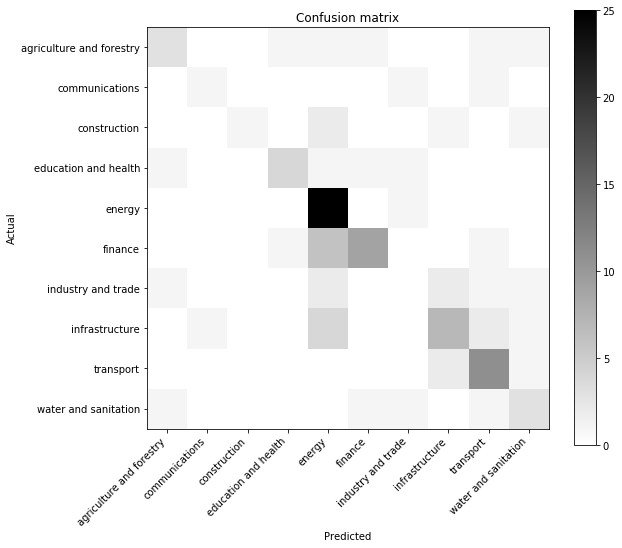

In [63]:
import matplotlib.pyplot as plt

confusion_matrix.plot()

In [71]:
from yellowbrick.classifier import ConfusionMatrix
#model = trained scikitlean model

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(ml_pipeline, classes=list(le.classes_))

cm.score(X_test, y_test)

cm.poof()

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:258: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

In [66]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import manifold
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

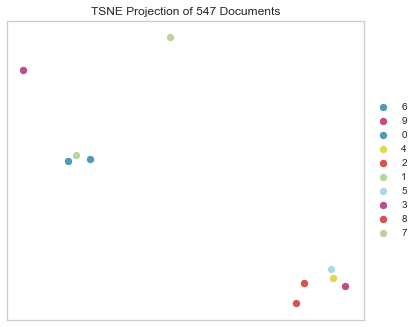

In [67]:
tsne = TSNEVisualizer()
tsne.fit(docs, labels)
tsne.poof()

In [ ]:
merged